## EIA Monthly Electric Grid Data - Generation Operations
## Exploratory Data Analysis

https://www.eia.gov/electricity/gridmonitor/about

In [112]:
import pandas as pd
import numpy as np

# genops.csv was retrieved from the U.S. Energy Information Administration API using code 
# in EIA_GetData3.ipynb
csv_path = 'joined_drop_dups.csv'

genops = pd.read_csv(csv_path, low_memory=False)
genops.shape

#eia_data['value'] = pd.to_numeric(eia_data['value'], errors='coerce')
#eia_data['period'] = pd.to_datetime(eia_data['period'], yearfirst=True, errors='coerce')
#eia_data = eia_data.rename(columns = {'value':'MWh'})
#eia_data = eia_data[['period','respondent','respondent_name', 'type', 'type_name', 'MWh']]

(2182642, 22)

In [113]:
genops = genops.drop_duplicates()
genops.shape

(2182642, 22)

In [114]:
genops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182642 entries, 0 to 2182641
Data columns (total 22 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   period                        object 
 1   plantCode                     int64  
 2   plantName                     object 
 3   fuel2002                      object 
 4   fuelTypeDescription           object 
 5   state                         object 
 6   stateDescription              object 
 7   primeMover                    object 
 8   average-heat-content          float64
 9   average-heat-content-units    object 
 10  consumption-for-eg            float64
 11  consumption-for-eg-units      object 
 12  consumption-for-eg-btu        int64  
 13  generation                    float64
 14  gross-generation              float64
 15  total-consumption             float64
 16  total-consumption-units       object 
 17  total-consumption-btu         int64  
 18  consumption-for-eg-btu

In [115]:
genops.head()

,period,plantCode,plantName,fuel2002,fuelTypeDescription,state,stateDescription,primeMover,average-heat-content,average-heat-content-units,...,consumption-for-eg-btu,generation,gross-generation,total-consumption,total-consumption-units,total-consumption-btu,consumption-for-eg-btu-units,generation-units,gross-generation-units,total-consumption-btu-units
0,2022-12,3,Barry,SUB,Coal,AL,Alabama,ST,0.000,MMBtu per short tons,...,0,0.00,0.00,0.0,MMBtu per short tons,0,MMBtu,megawatthours,megawatthours,MMBtu
1,2022-12,8223,Springerville,SUN,Solar,AZ,Arizona,ALL,0.000,NaN,...,8527,964.26,974.00,0.0,NaN,8527,MMBtu,megawatthours,megawatthours,MMBtu
2,2022-12,8223,Springerville,SUB,Coal,AZ,Arizona,ALL,18.053,MMBtu per short tons,...,8380726,741778.54,880021.41,464229.0,MMBtu per short tons,8380726,MMBtu,megawatthours,megawatthours,MMBtu
3,2022-12,50955,Rousselot Inc,NG,Natural Gas,MA,Massachusetts,ALL,1.030,MMBtu per Mcf,...,6491,1485.00,1560.00,67871.0,MMBtu per Mcf,69907,MMBtu,megawatthours,megawatthours,MMBtu
4,2022-12,50955,Rousselot Inc,ALL,Total,MA,Massachusetts,ALL,NaN,NaN,...,6491,1485.00,1560.00,NaN,NaN,69907,MMBtu,megawatthours,megawatthours,MMBtu


In [116]:
genops.columns = genops.columns.str.replace('-', '_')
genops['period'] = pd.to_datetime(genops['period'], yearfirst=True, errors='coerce')
genops['plantCode'] = 'P' + genops['plantCode'].astype(str)


In [117]:
genops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182642 entries, 0 to 2182641
Data columns (total 22 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   period                        datetime64[ns]
 1   plantCode                     object        
 2   plantName                     object        
 3   fuel2002                      object        
 4   fuelTypeDescription           object        
 5   state                         object        
 6   stateDescription              object        
 7   primeMover                    object        
 8   average_heat_content          float64       
 9   average_heat_content_units    object        
 10  consumption_for_eg            float64       
 11  consumption_for_eg_units      object        
 12  consumption_for_eg_btu        int64         
 13  generation                    float64       
 14  gross_generation              float64       
 15  total_consumption             fl

In [118]:
genops = genops.sort_values(by = 'period')

In [119]:
genops.head()

,period,plantCode,plantName,fuel2002,fuelTypeDescription,state,stateDescription,primeMover,average_heat_content,average_heat_content_units,...,consumption_for_eg_btu,generation,gross_generation,total_consumption,total_consumption_units,total_consumption_btu,consumption_for_eg_btu_units,generation_units,gross_generation_units,total_consumption_btu_units
2146490,2011-10-01,P55749,Hardin Generator Project,NG,Natural Gas,MT,Montana,ST,0.000,MMBtu per Mcf,...,0,0.0,0.0,0.0,MMBtu per Mcf,0,MMBtu,megawatthours,megawatthours,MMBtu
2147367,2011-10-01,P55126,Milford Power Project,NG,Natural Gas,CT,Connecticut,CS,1.021,MMBtu per Mcf,...,2662078,360952.0,369746.0,2607324.0,MMBtu per Mcf,2662078,MMBtu,megawatthours,megawatthours,MMBtu
2147368,2011-10-01,P55126,Milford Power Project,DFO,Distillate Fuel Oil,CT,Connecticut,CS,0.000,MMBtu per barrels,...,0,0.0,0.0,0.0,MMBtu per barrels,0,MMBtu,megawatthours,megawatthours,MMBtu
2147369,2011-10-01,P55126,Milford Power Project,NG,Natural Gas,CT,Connecticut,ALL,1.021,MMBtu per Mcf,...,2662078,360952.0,369746.0,2607324.0,MMBtu per Mcf,2662078,MMBtu,megawatthours,megawatthours,MMBtu
2147370,2011-10-01,P55126,Milford Power Project,DFO,Distillate Fuel Oil,CT,Connecticut,ALL,0.000,MMBtu per barrels,...,0,0.0,0.0,0.0,MMBtu per barrels,0,MMBtu,megawatthours,megawatthours,MMBtu


In [120]:
genops.tail()

,period,plantCode,plantName,fuel2002,fuelTypeDescription,state,stateDescription,primeMover,average_heat_content,average_heat_content_units,...,consumption_for_eg_btu,generation,gross_generation,total_consumption,total_consumption_units,total_consumption_btu,consumption_for_eg_btu_units,generation_units,gross_generation_units,total_consumption_btu_units
3335,2022-12-01,P10025,"RED-Rochester, LLC",DFO,Distillate Fuel Oil,NY,New York,ALL,5.81,MMBtu per barrels,...,177,24.82,24.93,101.0,MMBtu per barrels,587,MMBtu,megawatthours,megawatthours,MMBtu
3336,2022-12-01,P10025,"RED-Rochester, LLC",BIT,Coal,NY,New York,ALL,0.00,MMBtu per short tons,...,0,0.00,0.00,0.0,MMBtu per short tons,0,MMBtu,megawatthours,megawatthours,MMBtu
3337,2022-12-01,P10025,"RED-Rochester, LLC",ALL,Total,NY,New York,ALL,NaN,NaN,...,179407,25136.00,25239.00,NaN,NaN,594186,MMBtu,megawatthours,megawatthours,MMBtu
3330,2022-12-01,P3405,John Sevier,DFO,Distillate Fuel Oil,TN,Tennessee,ALL,0.00,MMBtu per barrels,...,0,0.00,0.00,0.0,MMBtu per barrels,0,MMBtu,megawatthours,megawatthours,MMBtu
0,2022-12-01,P3,Barry,SUB,Coal,AL,Alabama,ST,0.00,MMBtu per short tons,...,0,0.00,0.00,0.0,MMBtu per short tons,0,MMBtu,megawatthours,megawatthours,MMBtu


In [121]:
genops[genops.plantCode == 'P59157']

,period,plantCode,plantName,fuel2002,fuelTypeDescription,state,stateDescription,primeMover,average_heat_content,average_heat_content_units,...,consumption_for_eg_btu,generation,gross_generation,total_consumption,total_consumption_units,total_consumption_btu,consumption_for_eg_btu_units,generation_units,gross_generation_units,total_consumption_btu_units
1429963,2015-02-01,P59157,Pecan PV1,ALL,Total,NC,North Carolina,ALL,NaN,NaN,...,3914,420.05,422.42,NaN,NaN,3914,MMBtu,megawatthours,megawatthours,MMBtu
1429962,2015-02-01,P59157,Pecan PV1,SUN,Solar,NC,North Carolina,ALL,0.0,NaN,...,3914,420.05,422.42,0.0,NaN,3914,MMBtu,megawatthours,megawatthours,MMBtu
1429961,2015-02-01,P59157,Pecan PV1,SUN,Solar,NC,North Carolina,PV,0.0,NaN,...,3914,420.05,422.42,0.0,NaN,3914,MMBtu,megawatthours,megawatthours,MMBtu
1395564,2015-04-01,P59157,Pecan PV1,ALL,Total,NC,North Carolina,ALL,NaN,NaN,...,8100,869.19,874.09,NaN,NaN,8100,MMBtu,megawatthours,megawatthours,MMBtu
1395563,2015-04-01,P59157,Pecan PV1,SUN,Solar,NC,North Carolina,ALL,0.0,NaN,...,8100,869.19,874.09,0.0,NaN,8100,MMBtu,megawatthours,megawatthours,MMBtu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132653,2021-08-01,P59157,Pecan PV1,SUN,Solar,NC,North Carolina,ALL,0.0,NaN,...,8274,935.59,935.59,0.0,NaN,8274,MMBtu,megawatthours,megawatthours,MMBtu
132654,2021-08-01,P59157,Pecan PV1,ALL,Total,NC,North Carolina,ALL,NaN,NaN,...,8274,935.59,935.59,NaN,NaN,8274,MMBtu,megawatthours,megawatthours,MMBtu
115740,2021-09-01,P59157,Pecan PV1,SUN,Solar,NC,North Carolina,PV,0.0,NaN,...,7740,875.18,875.18,0.0,NaN,7740,MMBtu,megawatthours,megawatthours,MMBtu
115741,2021-09-01,P59157,Pecan PV1,SUN,Solar,NC,North Carolina,ALL,0.0,NaN,...,7740,875.18,875.18,0.0,NaN,7740,MMBtu,megawatthours,megawatthours,MMBtu


In [122]:
genops.describe(include=['O']).T

,count,unique,top,freq
plantCode,2182642,12070,P99999,3610
plantName,2182468,12842,State-Fuel Level Increment,3610
fuel2002,2182642,43,ALL,551148
fuelTypeDescription,2182642,19,Total,551148
state,2178858,52,CA,280451
stateDescription,2177234,51,California,280451
primeMover,2182642,19,ALL,1323476
average_heat_content_units,988980,4,MMBtu per Mcf,464612
consumption_for_eg_units,988980,4,Mcf,464612
total_consumption_units,988980,4,MMBtu per Mcf,464612


In [123]:
genops.describe().T

,count,mean,min,25%,50%,75%,max,std
period,2182642,2016-11-30 20:12:52.766217216,2011-10-01 00:00:00,2014-04-01 00:00:00,2016-12-01 00:00:00,2019-04-01 00:00:00,2022-12-01 00:00:00,NaN
average_heat_content,1631494.0,2.276519,0.0,0.0,0.0,1.04,3661.0,6.94832
consumption_for_eg,1631494.0,83481.307243,-1.0,0.0,0.0,3378.0,127886215.0,482859.127575
consumption_for_eg_btu,2182642.0,313744.167071,-6.0,234.0,6478.0,67186.0,365985262.0,1488033.032318
generation,2182642.0,33313.341847,-154605.0,19.43,719.745,7593.29,40672520.52,151158.652492
gross_generation,2182642.0,35182.241177,0.0,35.11,776.46,8291.465,41560782.32,158161.744693
total_consumption,1631494.0,97625.908035,-1.0,0.0,0.0,6008.0,155973481.0,561455.371414
total_consumption_btu,2182642.0,335361.38836,-6.0,294.0,7413.0,92790.75,440331497.0,1526664.212168


In [124]:
genops.fuelTypeDescription.unique()

array(['Natural Gas', 'Distillate Fuel Oil', 'Total', 'Wind', 'Other',
       'Geothermal', 'Other Gases', 'Solar', 'other renewables',
       'Municiapl Landfill Gas', 'Coal', 'Waste Oil and Other Oils',
       'Wood Waste Solids', 'Hydroelectric Conventional',
       'Petroleum Coke', 'Hydroelectric Pumped Storage',
       'Residual Fuel Oil', 'Nuclear', 'Waste Coal'], dtype=object)

In [125]:
genops.fuel2002.unique()

array(['NG', 'DFO', 'ALL', 'WND', 'WH', 'GEO', 'OG', 'SUN', 'OBG', 'BFG',
       'LFG', 'OTH', 'OBS', 'BIT', 'KER', 'WDS', 'SUB', 'LIG', 'OBL',
       'MWH', 'MSN', 'MSB', 'JF', 'BLQ', 'WAT', 'SGP', 'WO', 'RFO', 'NUC',
       'PUR', 'AB', 'TDF', 'SLW', 'PC', 'WC', 'SC', 'PG', 'WDL', 'ANT',
       'SGC', 'RC', 'MSW', 'H2'], dtype=object)

<Axes: xlabel='period'>

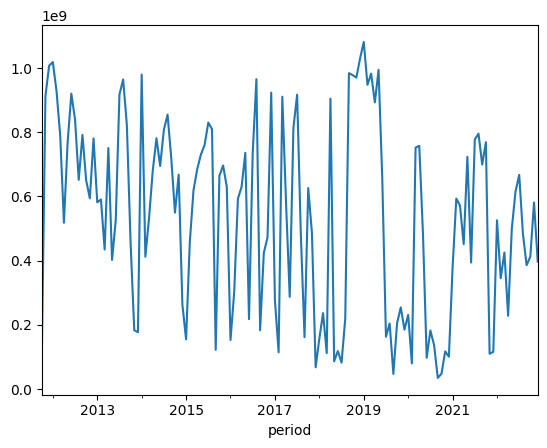

In [126]:
genops.groupby('period')['generation'].sum().plot(x='period',y='generation')

<Axes: xlabel='period'>

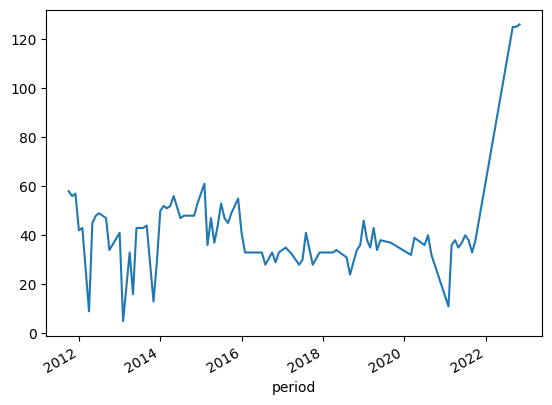

In [127]:
genops[genops.plantCode == 'P99999']['period'].value_counts().plot()

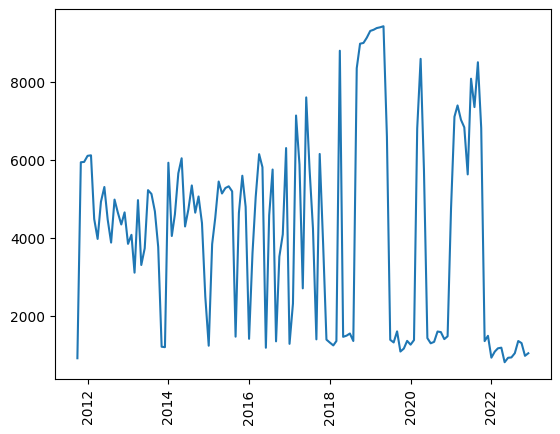

In [128]:
import matplotlib.pyplot as plt
p = plt.plot(genops['period'].unique(), genops.groupby('period')['plantCode'].nunique())
plt.xticks(rotation='vertical')
plt.show()

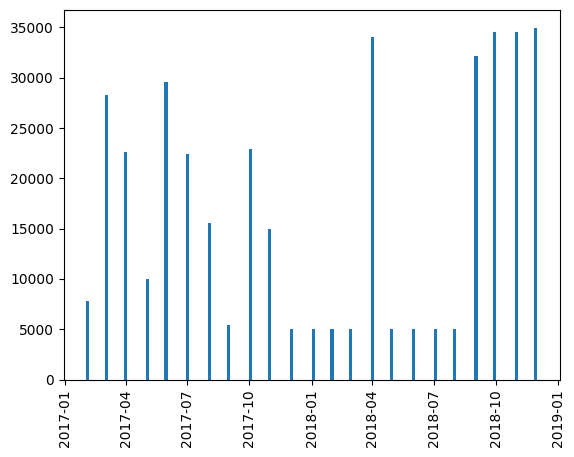

In [129]:
import matplotlib.pyplot as plt
p = plt.hist(genops[(genops.period > '2017-01-01') & (genops.period < '2019-01-01')]['period'], bins=144)
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='period'>

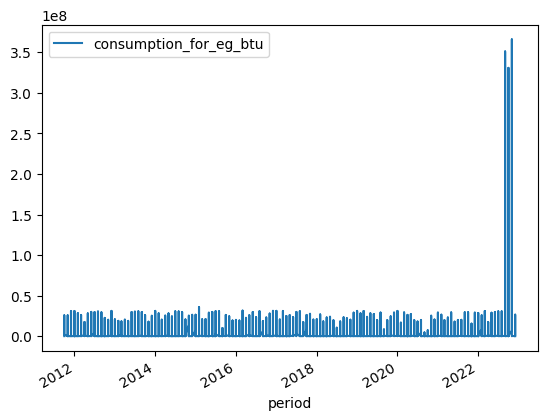

In [130]:
genops.plot(x='period', y='consumption_for_eg_btu')

<Axes: >

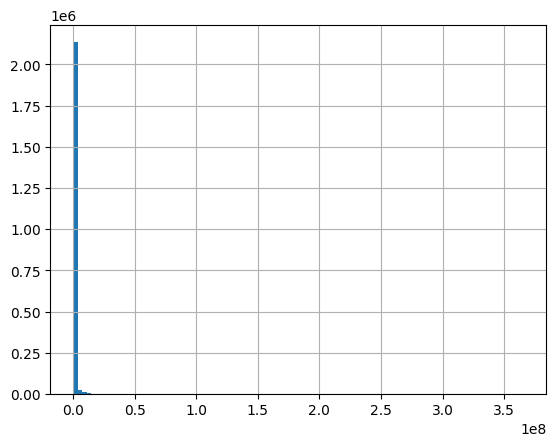

In [131]:
genops.consumption_for_eg_btu.hist(bins=100)

In [132]:
#group by BA using gencap data
import json
plant_ba_dict_fname = 'plant_ba_dict.json'
with open(plant_ba_dict_fname, "r") as infile:
    plant_ba_dict = json.load(infile)
print(plant_ba_dict)

{'P50663': 'PJM', 'P59157': 'CPLE', 'P59518': 'PJM', 'P59517': 'PJM', 'P59516': 'PJM', 'P59515': 'PJM', 'P59156': 'CPLE', 'P64655': 'WACM', 'P64654': 'WACM', 'P64653': 'WACM', 'P64652': 'WACM', 'P64651': 'WACM', 'P64650': 'WACM', 'P64649': 'WACM', 'P64648': 'WACM', 'P64647': 'PJM', 'P64646': 'PJM', 'P64645': 'PJM', 'P64644': 'PJM', 'P64643': 'PJM', 'P64642': 'PJM', 'P64608': 'PJM', 'P64606': 'PJM', 'P64605': 'ISNE', 'P63646': 'NYIS', 'P63645': 'PJM', 'P58102': 'CISO', 'P58101': 'CISO', 'P58096': 'PJM', 'P58095': 'PJM', 'P58094': 'PJM', 'P58093': 'PJM', 'P58085': 'CISO', 'P58091': 'PJM', 'P58084': 'ISNE', 'P58080': 'ERCO', 'P58079': 'PJM', 'P65580': 'ERCO', 'P61652': 'MISO', 'P56544': 'MISO', 'P61028': 'PJM', 'P50624': 'CISO', 'P59312': 'SWPP', 'P59311': 'SWPP', 'P64483': 'MISO', 'P64482': 'MISO', 'P64479': 'MISO', 'P64154': 'MISO', 'P64153': 'MISO', 'P63987': 'MISO', 'P63726': 'MISO', 'P63725': 'MISO', 'P63724': 'MISO', 'P63249': 'MISO', 'P63247': 'MISO', 'P63010': 'MISO', 'P63009': 'M

In [133]:
genops['ba_code'] = genops['plantCode'].map(plant_ba_dict)
genops.head()

,period,plantCode,plantName,fuel2002,fuelTypeDescription,state,stateDescription,primeMover,average_heat_content,average_heat_content_units,...,generation,gross_generation,total_consumption,total_consumption_units,total_consumption_btu,consumption_for_eg_btu_units,generation_units,gross_generation_units,total_consumption_btu_units,ba_code
2146490,2011-10-01,P55749,Hardin Generator Project,NG,Natural Gas,MT,Montana,ST,0.000,MMBtu per Mcf,...,0.0,0.0,0.0,MMBtu per Mcf,0,MMBtu,megawatthours,megawatthours,MMBtu,NWMT
2147367,2011-10-01,P55126,Milford Power Project,NG,Natural Gas,CT,Connecticut,CS,1.021,MMBtu per Mcf,...,360952.0,369746.0,2607324.0,MMBtu per Mcf,2662078,MMBtu,megawatthours,megawatthours,MMBtu,ISNE
2147368,2011-10-01,P55126,Milford Power Project,DFO,Distillate Fuel Oil,CT,Connecticut,CS,0.000,MMBtu per barrels,...,0.0,0.0,0.0,MMBtu per barrels,0,MMBtu,megawatthours,megawatthours,MMBtu,ISNE
2147369,2011-10-01,P55126,Milford Power Project,NG,Natural Gas,CT,Connecticut,ALL,1.021,MMBtu per Mcf,...,360952.0,369746.0,2607324.0,MMBtu per Mcf,2662078,MMBtu,megawatthours,megawatthours,MMBtu,ISNE
2147370,2011-10-01,P55126,Milford Power Project,DFO,Distillate Fuel Oil,CT,Connecticut,ALL,0.000,MMBtu per barrels,...,0.0,0.0,0.0,MMBtu per barrels,0,MMBtu,megawatthours,megawatthours,MMBtu,ISNE


In [134]:
genops.isna().sum()

period                                0
plantCode                             0
plantName                           174
fuel2002                              0
fuelTypeDescription                   0
state                              3784
stateDescription                   5408
primeMover                            0
average_heat_content             551148
average_heat_content_units      1193662
consumption_for_eg               551148
consumption_for_eg_units        1193662
consumption_for_eg_btu                0
generation                            0
gross_generation                      0
total_consumption                551148
total_consumption_units         1193662
total_consumption_btu                 0
consumption_for_eg_btu_units          0
generation_units                      0
gross_generation_units                0
total_consumption_btu_units           0
ba_code                           70627
dtype: int64

In [135]:
genops[genops.ba_code.isna()]['state'].unique()

array(['IA', 'MD', 'HI', 'IL', 'NY', nan, 'CO', 'GA', 'TN', 'ND', 'NC',
       'NH', 'AK', 'TX', 'NJ', 'MO', 'MA', 'CA', 'ME', 'NV', 'MN', 'MS',
       'FL', 'PA', 'OK', 'OH', 'AL', 'KS', 'VA', 'WI', 'NE', 'KY', 'MI',
       'RI', 'WA', 'WV', 'UT', 'SC', 'IN', 'AZ', 'NM', 'DC', 'PR', 'LA'],
      dtype=object)

In [136]:
genops.head().T

,2146490,2147367,2147368,2147369,2147370
period,2011-10-01 00:00:00,2011-10-01 00:00:00,2011-10-01 00:00:00,2011-10-01 00:00:00,2011-10-01 00:00:00
plantCode,P55749,P55126,P55126,P55126,P55126
plantName,Hardin Generator Project,Milford Power Project,Milford Power Project,Milford Power Project,Milford Power Project
fuel2002,NG,NG,DFO,NG,DFO
fuelTypeDescription,Natural Gas,Natural Gas,Distillate Fuel Oil,Natural Gas,Distillate Fuel Oil
state,MT,CT,CT,CT,CT
stateDescription,Montana,Connecticut,Connecticut,Connecticut,Connecticut
primeMover,ST,CS,CS,ALL,ALL
average_heat_content,0.0,1.021,0.0,1.021,0.0
average_heat_content_units,MMBtu per Mcf,MMBtu per Mcf,MMBtu per barrels,MMBtu per Mcf,MMBtu per barrels


In [137]:
genops['consumption_for_eg_btu_units'].unique()

array(['MMBtu'], dtype=object)

In [138]:
genops['generation_units'].unique()

array(['megawatthours'], dtype=object)

In [139]:
genops.shape

(2182642, 23)

In [140]:
(2148621-2078969)/2148621
# ~3% of genops lines not assigned to BA

0.03241707122847631

In [141]:
genops.dropna(subset='ba_code', inplace=True)

In [142]:
genops.shape

(2112015, 23)

In [143]:
genops.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2112015 entries, 2146490 to 0
Data columns (total 23 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   period                        datetime64[ns]
 1   plantCode                     object        
 2   plantName                     object        
 3   fuel2002                      object        
 4   fuelTypeDescription           object        
 5   state                         object        
 6   stateDescription              object        
 7   primeMover                    object        
 8   average_heat_content          float64       
 9   average_heat_content_units    object        
 10  consumption_for_eg            float64       
 11  consumption_for_eg_units      object        
 12  consumption_for_eg_btu        int64         
 13  generation                    float64       
 14  gross_generation              float64       
 15  total_consumption             float64

In [144]:
genops['generation'].describe()

count    2.112015e+06
mean     3.401290e+04
std      1.433583e+05
min     -1.546050e+05
25%      2.445000e+01
50%      7.534300e+02
75%      7.985515e+03
max      3.141957e+06
Name: generation, dtype: float64

In [145]:
genout = genops[['period', 'ba_code', 'fuel2002', 'consumption_for_eg_btu', 'generation']]
genout = genout.rename(columns={'fuel2002':'energy_src', 'consumption_for_eg_btu': \
                                'consumed_mbtu', 'generation':'gen_mwh'})
genout.head()

,period,ba_code,energy_src,consumed_mbtu,gen_mwh
2146490,2011-10-01,NWMT,NG,0,0.0
2147367,2011-10-01,ISNE,NG,2662078,360952.0
2147368,2011-10-01,ISNE,DFO,0,0.0
2147369,2011-10-01,ISNE,NG,2662078,360952.0
2147370,2011-10-01,ISNE,DFO,0,0.0


In [146]:
genout = genout[genout.energy_src != 'ALL'].reset_index(drop=True)
genout.head()

,period,ba_code,energy_src,consumed_mbtu,gen_mwh
0,2011-10-01,NWMT,NG,0,0.0
1,2011-10-01,ISNE,NG,2662078,360952.0
2,2011-10-01,ISNE,DFO,0,0.0
3,2011-10-01,ISNE,NG,2662078,360952.0
4,2011-10-01,ISNE,DFO,0,0.0


<Axes: xlabel='period'>

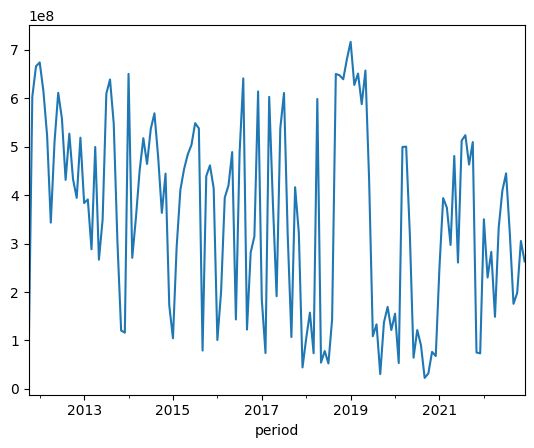

In [147]:
genout.groupby('period')['gen_mwh'].sum().plot(x='period',y='generation')

In [148]:
genout[genout.energy_src == 'SUN'].describe()

,period,consumed_mbtu,gen_mwh
count,250955,2.509550e+05,250955.000000
mean,2018-07-14 08:38:51.955928576,2.036881e+04,2258.385854
min,2011-10-01 00:00:00,0.000000e+00,-48.070000
25%,2016-11-01 00:00:00,1.740000e+03,191.890000
50%,2018-12-01 00:00:00,3.585000e+03,396.810000
75%,2020-12-01 00:00:00,8.653000e+03,959.360000
max,2022-12-01 00:00:00,1.246365e+06,136903.000000
std,NaN,6.460834e+04,7155.722014


In [149]:
# wtf does EIA really track amount of 'SUN' fuel consumed?

In [150]:
genout.head()

,period,ba_code,energy_src,consumed_mbtu,gen_mwh
0,2011-10-01,NWMT,NG,0,0.0
1,2011-10-01,ISNE,NG,2662078,360952.0
2,2011-10-01,ISNE,DFO,0,0.0
3,2011-10-01,ISNE,NG,2662078,360952.0
4,2011-10-01,ISNE,DFO,0,0.0


In [151]:
esrc_co2_dict_fname = 'esrc_co2_dict.json'
with open(esrc_co2_dict_fname, "r") as infile:
    esrc_co2_dict = json.load(infile)
e_co2 = {}
for k, v in esrc_co2_dict.items():
    e_co2[k] = v['kg_co2_per_million_btu']
#print(e_co2)
genout['co2_kton'] = genout['consumed_mbtu']*genout['energy_src'].map(e_co2)/1e6

In [152]:
genout.head(10)

,period,ba_code,energy_src,consumed_mbtu,gen_mwh,co2_kton
0,2011-10-01,NWMT,NG,0,0.00,0.000000
1,2011-10-01,ISNE,NG,2662078,360952.00,140.850547
2,2011-10-01,ISNE,DFO,0,0.00,0.000000
3,2011-10-01,ISNE,NG,2662078,360952.00,140.850547
4,2011-10-01,ISNE,DFO,0,0.00,0.000000
5,2011-10-01,BPAT,WND,30052,3093.07,0.000000
6,2011-10-01,BPAT,WND,30052,3093.07,0.000000
7,2011-10-01,GRIF,NG,24977,2254.00,1.321533
8,2011-10-01,GRIF,NG,1035,1161.00,0.054762
9,2011-10-01,SPS,WND,26046,2680.71,0.000000


In [153]:
import json

BA_dict_fname = 'BA_dict.json'
with open(BA_dict_fname, "r") as infile:
    BA_dict = json.load(infile)
print(BA_dict)

{'YAD': {'BA_Name': 'Alcoa Power Generating, Inc. - Yadkin Division', 'Time_Zone': 'Eastern', 'Region_Country_Code': 'CAR', 'Region_Country_Name': 'Carolinas', 'Generation_Only_BA': 'Yes', 'Demand_by_BA_Subregion': 'No', 'US_BA': 'Yes', 'Active_BA': 'Yes', 'Activation_Date': '', 'Retirement_Date': ''}, 'AZPS': {'BA_Name': 'Arizona Public Service Company', 'Time_Zone': 'Arizona', 'Region_Country_Code': 'SW', 'Region_Country_Name': 'Southwest', 'Generation_Only_BA': 'No', 'Demand_by_BA_Subregion': 'No', 'US_BA': 'Yes', 'Active_BA': 'Yes', 'Activation_Date': '', 'Retirement_Date': ''}, 'DEAA': {'BA_Name': 'Arlington Valley, LLC', 'Time_Zone': 'Arizona', 'Region_Country_Code': 'SW', 'Region_Country_Name': 'Southwest', 'Generation_Only_BA': 'Yes', 'Demand_by_BA_Subregion': 'No', 'US_BA': 'Yes', 'Active_BA': 'Yes', 'Activation_Date': '', 'Retirement_Date': ''}, 'AECI': {'BA_Name': 'Associated Electric Cooperative, Inc.', 'Time_Zone': 'Central', 'Region_Country_Code': 'MIDW', 'Region_Country_

In [154]:
#remove non-US BAs, and larger regions
genout = genout[genout.ba_code.isin(BA_dict.keys())]
genout.shape

(1480831, 6)

In [155]:
genout = genout.groupby(['period', 'ba_code'], as_index = False)[['gen_mwh','co2_kton']] \
    .aggregate('sum')
genout.head()

,period,ba_code,gen_mwh,co2_kton
0,2011-10-01,AECI,89375.94,5.319134
1,2011-10-01,AVA,126924.36,43.122421
2,2011-10-01,AZPS,1577691.52,1425.363357
3,2011-10-01,BANC,17864.18,3.974493
4,2011-10-01,BPAT,881106.62,79.474312


In [156]:
conditions = [(genout.gen_mwh <= 0), (genout.gen_mwh > 0)]
results = [float('nan'), (genout['co2_kton']/genout['gen_mwh'])*1e6]
genout['kg_co2_per_mwh'] = np.select(conditions, results)
genout.head()

,period,ba_code,gen_mwh,co2_kton,kg_co2_per_mwh
0,2011-10-01,AECI,89375.94,5.319134,59.514158
1,2011-10-01,AVA,126924.36,43.122421,339.748972
2,2011-10-01,AZPS,1577691.52,1425.363357,903.448703
3,2011-10-01,BANC,17864.18,3.974493,222.483953
4,2011-10-01,BPAT,881106.62,79.474312,90.198292


<function matplotlib.pyplot.show(close=None, block=None)>

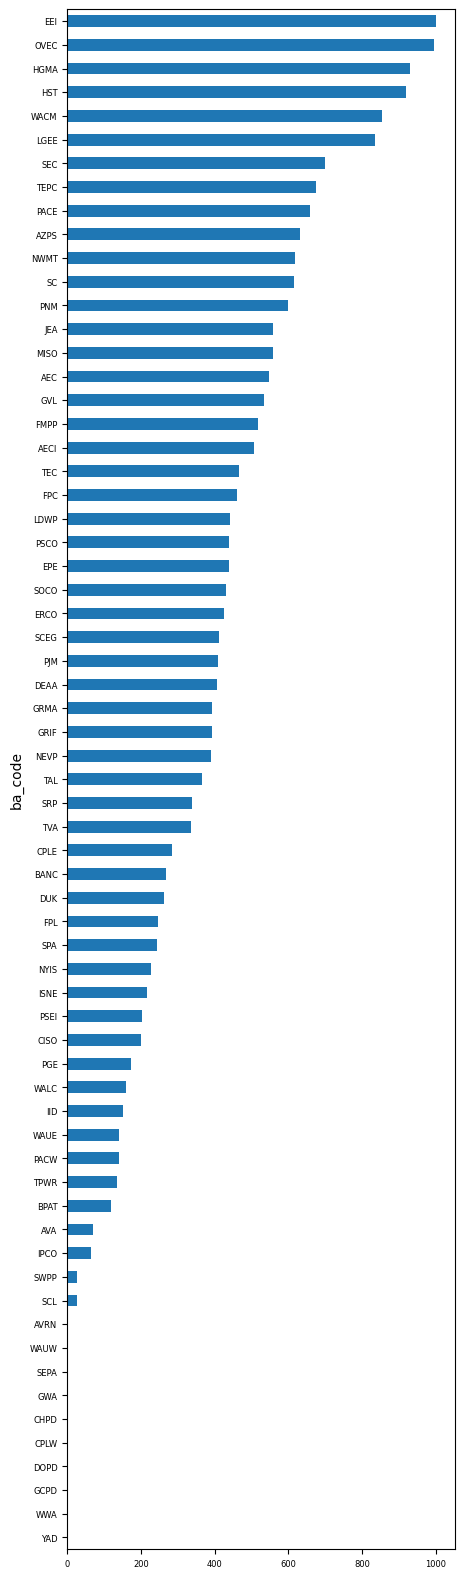

In [157]:
import matplotlib.pyplot as plt
#genout.groupby('ba_code')[['period','kg_co2_per_mwh']].plot(x='period',y='kg_co2_per_mwh')
plt.figure(1, [5,20])
ax = genout[genout.ba_code != 'NSB'].groupby('ba_code')['kg_co2_per_mwh'].mean().sort_values().plot.barh()
plt.tick_params(labelsize=6)
plt.show

In [158]:
genout.describe()

,period,gen_mwh,co2_kton,kg_co2_per_mwh
count,7673,7.673000e+03,7673.000000,7503.000000
mean,2017-04-03 21:55:45.705721600,5.904371e+06,2555.036827,555.052725
min,2011-10-01 00:00:00,-4.179400e+04,0.000000,0.000000
25%,2014-06-01 00:00:00,2.823691e+05,3.515658,44.793138
50%,2017-04-01 00:00:00,1.087496e+06,289.285449,324.543139
75%,2020-02-01 00:00:00,3.950621e+06,1929.346219,564.436559
max,2022-12-01 00:00:00,1.557952e+08,82592.292609,200178.000000
std,NaN,1.508456e+07,7518.962913,5907.327650


array([[<Axes: title={'center': 'period'}>,
        <Axes: title={'center': 'gen_mwh'}>],
       [<Axes: title={'center': 'co2_kton'}>,
        <Axes: title={'center': 'kg_co2_per_mwh'}>]], dtype=object)

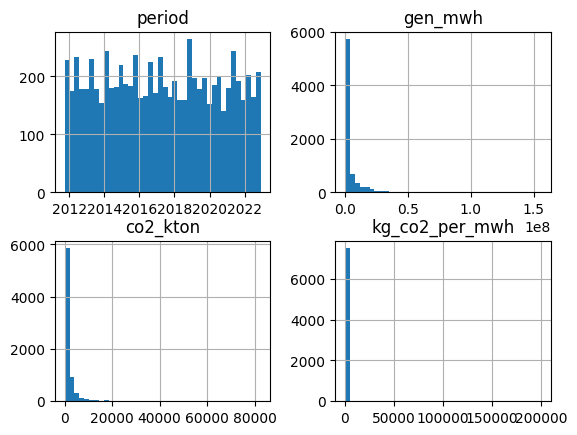

In [159]:
genout.hist(bins=40)

In [160]:
# save genout to csv
genout_fname = 'genout.csv'
with open(genout_fname, 'w') as outfile:
    genout.to_csv(outfile)